In [ ]:
import pandas as pd
import sklearn
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

# **TRAINING DATA PRE-PROCESSING**

In [ ]:
full_data=pd.read_csv('/content/emails.csv')

# Data **Shape**

In [ ]:
full_data.shape

(5172, 3002)

In [ ]:
full_data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


### missing **values**

<Axes: >

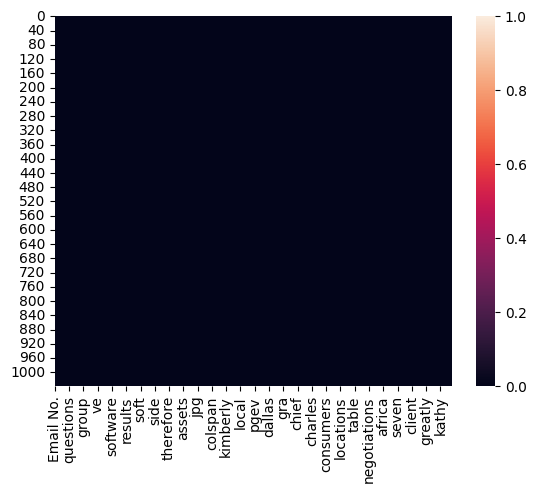

In [ ]:
sns.heatmap(full_data.isnull() )

In [ ]:
full_data.dropna(inplace = True)

### **Distribution of Data**

<Axes: >

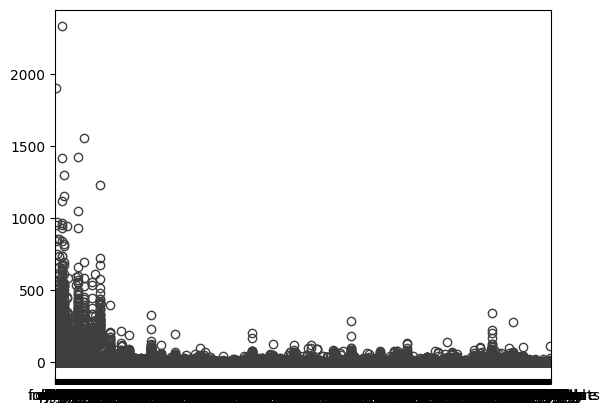

In [ ]:
# sns.boxplot(data=full_data)

In [ ]:
full_data.shape


(4339, 3002)

In [ ]:
full_data.drop(['Email No.'],axis=1,inplace = True)

In [ ]:
full_data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,...,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,6.207652,5.781747,5.484443,2.823462,3.009219,2.445725,52.280018,2.332335,2.186218,9.892832,...,0.005992,0.006453,0.011984,0.088500,0.004148,0.007375,0.004609,0.906661,0.006223,0.285550
std,11.404604,9.163470,15.208446,5.807833,4.575670,6.129537,84.185163,4.282034,7.501798,18.784252,...,0.115474,0.113435,0.124627,0.544476,0.098309,0.150122,0.077281,2.905742,0.094613,0.451728
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,4.000000,3.000000,4.000000,2.000000,58.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,44.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,5.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
full_data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


### **GETTING MODEL READY**

### **Target Variable Splitting**

In [ ]:
x = full_data.drop('Prediction',axis = 1)
y=full_data['Prediction']

In [ ]:
x.shape
y.shape

(343,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

#  **Decision Tree**

## **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

## **Model Testing**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 92.85 %


# **Random Forest**

## **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

## **Model Testing**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('RandomForestClassifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

RandomForestClassifier
------------------------------------------------------------
Accuracy 97.2 %
